## Importing Data

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/huzaifsayed/Linear-Regression-Model-for-House-Price-Prediction/master/USA_Housing.csv')

In [3]:
df.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [4]:
y= df['Price']
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

## Splitting  train and test Data 

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

## Creating Model and fitting Data

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()

In [9]:
model_train= lr.fit(X_train,y_train)
model_test= lr.fit(X_test,y_test)

In [10]:
y_hat_train = model_train.predict(X_train)


In [11]:
y_hat_test = model_train.predict(X_test)


In [12]:
model_train.coef_

array([2.16269946e+01, 1.63408119e+05, 1.19434472e+05, 3.11524812e+03,
       1.50149681e+01])

In [13]:
model_train.intercept_

np.float64(-2621895.554204804)

In [14]:
import numpy as np
X_predict = np.array([[423232, 6, 7, 4, 23086.800503]])
prediction = model_train.predict(X_predict)
print(prediction)

[8706939.20489085]


C:\Users\daudk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##  Applying  Mean Squared Error and R2 Score

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# for trainning features 
mse_train = mean_squared_error(y_train, y_hat_train)
r2_train = r2_score(y_train, y_hat_train)


In [17]:
# for testing features 
mse_test = mean_squared_error(y_test, y_hat_test)
r2_test = r2_score(y_test, y_hat_test)


In [18]:
 # Function to convert values to float
def convert(num):
    value= float(num)
    return value

In [19]:
print ('MSE Train', convert(mse_train) )
print ('R2 Train', convert(r2_train) )


MSE Train 10330442300.793333
R2 Train 0.9178135026614909


In [20]:
print ('MSE Test', convert(mse_test) )
print ('R2 Test', convert(r2_test) )

MSE Test 9913841580.996483
R2 Test 0.9177635994407403


## Mean Absolute Error , Mean Squared Error , r2

In [30]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_hat_test))
print('MSE:', metrics.mean_squared_error(y_test, y_hat_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

MAE: 80771.72013104451
MSE: 9913841580.996483
RMSE: 99568.27597682146


In [21]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.626995
Avg. Area House Age,163408.118764
Avg. Area Number of Rooms,119434.472390
Avg. Area Number of Bedrooms,3115.248120
Area Population,15.014968


## Vitualizing Data

In [22]:
import matplotlib.pyplot as plt


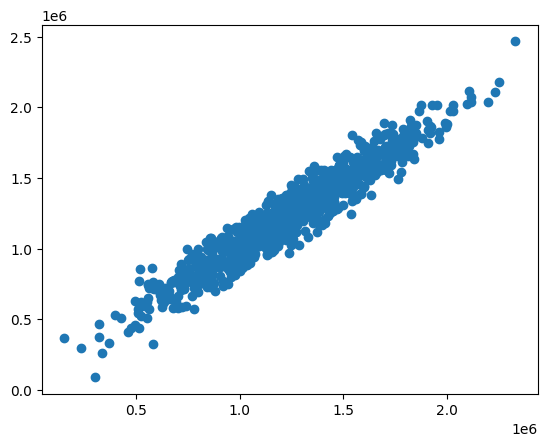

In [27]:
plt.scatter(y_test,y_hat_test)
